<h1>Experiment-9</h1>
<h1>Mushroom Classification</h1>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [23]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [24]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [25]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [26]:
df['class'].unique()

array([1, 0])

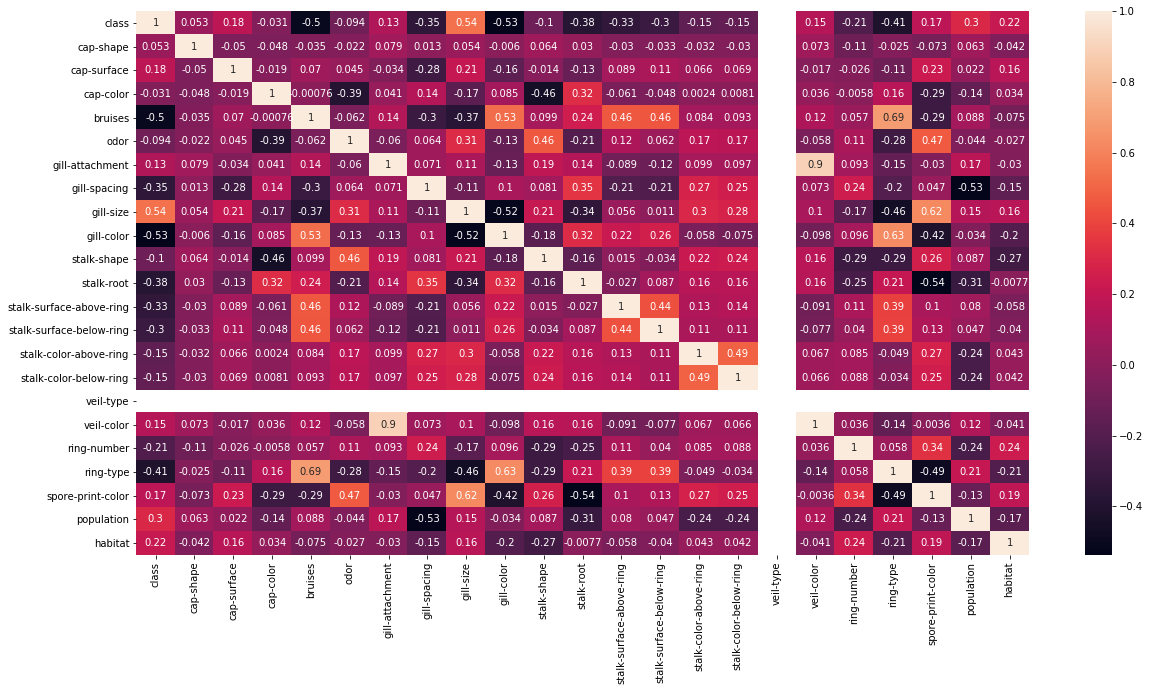

In [28]:
import seaborn as sns
plt.figure(figsize = (20, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True,)
plt.show()

In [29]:
def find_features(feature,final):
    if(df[feature].corr(df['class'])>0):
        final.append(feature)

In [31]:
final = []
for i in range(len(df.columns)):
    find_features(df.columns[i],final)
final

['class',
 'cap-shape',
 'cap-surface',
 'gill-attachment',
 'gill-size',
 'veil-color',
 'spore-print-color',
 'population',
 'habitat']

In [32]:
df = df[['class',
 'cap-shape',
 'cap-surface',
 'gill-attachment',
 'gill-size',
 'veil-color',
 'spore-print-color',
 'population',
 'habitat']]

In [33]:
x = df.drop('class',axis=1)
y = df['class']
print(x)
print(y)

      cap-shape  cap-surface  gill-attachment  gill-size  veil-color  \
0             5            2                1          1           2   
1             5            2                1          0           2   
2             0            2                1          0           2   
3             5            3                1          1           2   
4             5            2                1          0           2   
...         ...          ...              ...        ...         ...   
8119          3            2                0          0           1   
8120          5            2                0          0           0   
8121          2            2                0          0           1   
8122          3            3                1          1           2   
8123          5            2                0          0           1   

      spore-print-color  population  habitat  
0                     2           3        5  
1                     3           2      

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=0)
print ('Train data shape:', X_train.shape,  y_train.shape)
print ('Test data shape:', X_test.shape,  y_test.shape)

Train data shape: (6093, 8) (6093,)
Test data shape: (2031, 8) (2031,)


KNN

In [35]:
import math
x = X_train.shape[0]
k = round(math.sqrt(x))
k

78

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import statistics

In [40]:
from sklearn.model_selection import GridSearchCV

knn_grid = {
    'n_neighbors' : [75,76,77,78],
    'metric' : ['minkowski','manhattan','euclidean']
}

knn_model_grid = GridSearchCV(KNeighborsClassifier(),knn_grid,cv=5)
knn_model_grid.fit(X_train,y_train)
knn_model_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 75}

In [41]:
knn_classifier = KNeighborsClassifier(n_neighbors=75,metric='manhattan')
knn_classifier.fit(X_train,y_train)
pred = knn_classifier.predict(X_test)
#accuracy_score(y_test,pred)
print("KNN accuracy : {:.2f}%".format(accuracy_score(y_test,pred)*100))

KNN accuracy : 93.99%


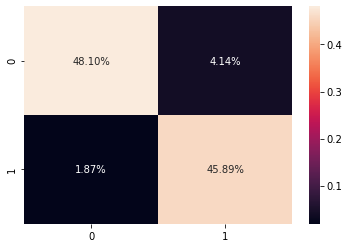

In [42]:
from sklearn.metrics import confusion_matrix
cf_knn = confusion_matrix(y_test,pred)
sns.heatmap(cf_knn/np.sum(cf_knn), annot=True, 
            fmt='.2%')

Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
random_grid = {
    'n_estimators' : [100,200,300,400],
    'criterion' : ['gini','entropy'],
    'max_features' : ['auto','sqrt','log2']
}

In [44]:
random_class = GridSearchCV(RandomForestClassifier(),random_grid,cv = 5)
random_class.fit(X_train,y_train)
random_class.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}

In [45]:
random_tree_model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='sqrt')
random_tree_model.fit(X_train,y_train)
pred = random_tree_model.predict(X_test)
print("Random Forest accuracy : {:.2f}%".format(accuracy_score(y_test,pred)*100))

Random Forest accuracy : 99.26%
